# FIFA - DATASET
*data extracting
*data analysing
*data cleaning
*data vizualization

IMPORTING LIBRARIES NEEDED FOR THE PROJECT

In [37]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# ReGexx
import re

# BS4 -> BeautifulSoup
from bs4 import BeautifulSoup

# Requests
import requests

# plotly for data vizualisation
import plotly.express as plx

# web scraping
we need dataset for first 10 pages of the website
link =  https://sofifa.com/players?offset=0

In [38]:
fifa_final = pd.DataFrame()
'''as per the condition we need only 10 pages
so here we use a loop with the range of (0, 540,60)
so we can get the raw data in html format for 10 pages.
using regex were are substituting unwanted values with empty string.
and appending it to the particular list.
then dataframe created using the list.
'''
for i in range(0,541,60):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  soup = BeautifulSoup(req.content)
  lists = [[] for _ in range(10)]

  for i in soup.findAll('tr'):
    Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
    Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
    Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
    OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
    POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
    Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
    Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
    Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
    Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
    Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))

    lists[0].append(Image_link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)

  fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                    'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                    'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                    'Total_stats':lists[9]})
  
  fifa.drop(0, inplace=True)
  
  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Value'] = pd.to_numeric(fifa['Value'])
  fifa['Wage'] = pd.to_numeric(fifa['Wage'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

  fifa_final = fifa_final.append(fifa, ignore_index = True)  # DataFrame created with the name fifa_final

# DATA ANALYSING

# Q1. Present the columns names

In [39]:
#The columns names of the dataframe
fifa_final.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

# Q2. How many columns do the dataset has

In [40]:
# The dataset has 10 columns
len(fifa_final.columns)

10

# Q3. How many datapoints and columns are there

In [41]:
# dataframe contains 600 datapoints and 10 columns
fifa_final.shape

(600, 10)

# Q4. Show the statistical info

In [42]:
# The mathematical statistic information of the dataframe
fifa_final.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,23.228333,77.113333,83.928333,32.127333,77.473333,1893.566667
std,4.313607,6.230719,3.698106,67.436522,117.966419,234.439328
min,16.000000,59.000000,64.000000,0.000000,0.000000,933.000000
25%,20.000000,73.000000,82.000000,6.500000,17.000000,1765.750000
50%,22.000000,77.000000,84.000000,18.750000,43.000000,1918.000000
75%,25.000000,82.000000,86.000000,36.500000,82.000000,2057.000000
max,40.000000,93.000000,95.000000,850.000000,950.000000,2335.000000


# Q5. How many null values are there in each column?

In [43]:
fifa_final.isna().sum()
# dataframe consists of 0 null value in each column

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

# Q6. Total Null values in the dataset?

In [44]:
fifa_final.isna().sum().sum()
# The dataframe consists of 0 null value

0

# Q7. Check for Duplicate values

In [45]:
fifa_final.duplicated().sum()
# the are duplicate values present's in the dataframe

8

# Q8. Show all the duplicate values

In [46]:
fifa_final[fifa_final.duplicated()]
# these are the duplicate datapoint in the dataframe

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
120,https://cdn.sofifa.net/players/188/567/22_120.png,Pierre-Emerick Aubameyang,32,85,85,Arsenal,2018 ~ 2023,43.5,145,2049
202,https://cdn.sofifa.net/players/246/875/22_120.png,Odilon Kossounou,20,74,84,Bayer 04 Leverkusen,2021 ~ 2026,8.5,25,1674
250,https://cdn.sofifa.net/players/231/352/22_120.png,Tammy Abraham,23,79,86,Roma,2021 ~ 2026,35.5,54,1788
326,https://cdn.sofifa.net/players/238/067/22_120.png,Nicolò Zaniolo,21,78,86,Roma,2018 ~ 2024,31.5,42,2057
383,https://cdn.sofifa.net/players/226/110/22_120.png,Nicolas Pépé,26,80,81,Arsenal,2019 ~ 2024,25.0,88,2004
443,https://cdn.sofifa.net/players/225/539/22_120.png,Dominic Solanke,23,74,78,AFC Bournemouth,2019 ~ 2022,6.0,29,1790
506,https://cdn.sofifa.net/players/231/969/22_120.png,Ruslan Malinovskyi,28,81,81,Atalanta,2019 ~ 2023,26.5,68,2195
573,https://cdn.sofifa.net/players/235/875/22_120.png,Pol Mikel Lirola Kosok,23,75,81,Olympique de Marseille,2021 ~ 2026,9.0,29,1985


# Q9. Drop the duplicate values 

In [47]:
#storing the dataframe to a new variable 
newfifa_final = fifa_final.copy()
newfifa_final.drop_duplicates(inplace=True)
# dropped the duplicated datapoint's in the dataframe

# Q10. Reset the index

In [48]:
newfifa_final.reset_index(inplace=True)
# index has been resetted

# Q11. Delete the columns - index, Image_link, Duration

In [49]:
newfifa_final.drop(['index', 'Image_link', 'Duration'], axis=1, inplace=True)
# droped the listed columns fromthe dataframe

# Q12. Find all the (name) Player who is having the highest wage.

In [50]:
newfifa_final.nlargest(585, "Wage")[['Name', 'Wage']]
# these players are having highest wage

,Name,Wage
355,Antwoine Hackford,950
465,Ladislav Krejčí,850
153,Manor Solomon,800
441,Domilson Cordeiro dos Santos,800
576,Mateus Tetê,800
...,...,...
385,Takuya Matsuura,1
403,Ricardo Pepi,1
412,Kosuke Saito,1
512,Gavin Bazunu,1


# Q13.List out the Top 10 Players according to their POT

In [51]:
newfifa_final.nlargest(10, 'POT')
# these are the top 10 players who are having highest POT

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
91,Kylian Mbappé,22,91,95,Paris Saint-Germain,194.0,230,2175
27,Erling Haaland,20,88,94,Borussia Dortmund,143.5,110,2109
22,Lionel Messi,34,93,93,Paris Saint-Germain,78.0,320,2219
327,Gianluigi Donnarumma,22,89,93,Paris Saint-Germain,119.5,110,1377
39,Robert Lewandowski,32,92,92,FC Bayern München,119.5,270,2211
78,Frenkie de Jong,24,87,92,FC Barcelona,119.5,210,2229
87,Phil Foden,21,84,92,Manchester City,94.5,140,2073
116,Kai Havertz,22,84,92,Chelsea,94.5,130,2038
21,João Félix Sequeira,21,83,91,Atlético de Madrid,82.0,61,2082
31,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2202


# Q14. Find out the (all the) Youngest player

In [52]:
newfifa_final.loc[newfifa_final['Age'] == newfifa_final["Age"].min()][['Name', 'Age']]
# these are the youngest player's in the dataframe 

,Name,Age
8,Youssoufa Moukoko,16
13,Pablo Martín Páez Gavira,16
15,Luka Romero,16


# Q15. Find out the (all the) Oldest player

In [53]:
newfifa_final.loc[newfifa_final['Age'] == newfifa_final['Age'].max()][['Name', 'Age']]
# the oldest player in the dataframe

,Name,Age
357,Maximiliano Rodríguez,40


# Q16. Find the Player(s) whose Potential is more than 90 but age < 20

In [70]:
newfifa_final.loc[newfifa_final['POT']>90][newfifa_final['Age']<20][['Name','Age', 'POT']]

C:\Users\shoba\AppData\Local\Temp/ipykernel_4200/3398481816.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Name,Age,POT
82,Pedro González López,18,91


# Q17. Find the Player(s) whose Value > 10 but Wages < 50

In [72]:
newfifa_final[newfifa_final["Value"]>10][newfifa_final["Wage"]<50][["Name", "Value", "Wage"]]

C:\Users\shoba\AppData\Local\Temp/ipykernel_4200/573935585.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Name,Value,Wage
6,Attila Szalai,11.0,34
7,Denis Zakaria,35.5,30
9,Jude Bellingham,44.5,22
17,Florian Wirtz,44.5,20
23,Sven Botman,25.5,27
...,...,...,...
566,Viktor Tsygankov,32.0,1
567,Sofiane Diop,21.5,35
572,Roger Ibañez Da Silva,20.0,37
574,Jon Moncayola Tollar,12.5,22


# Q18. Plot a Graph - First 10 Player's Name Vs Player's POT

<BarContainer object of 10 artists>

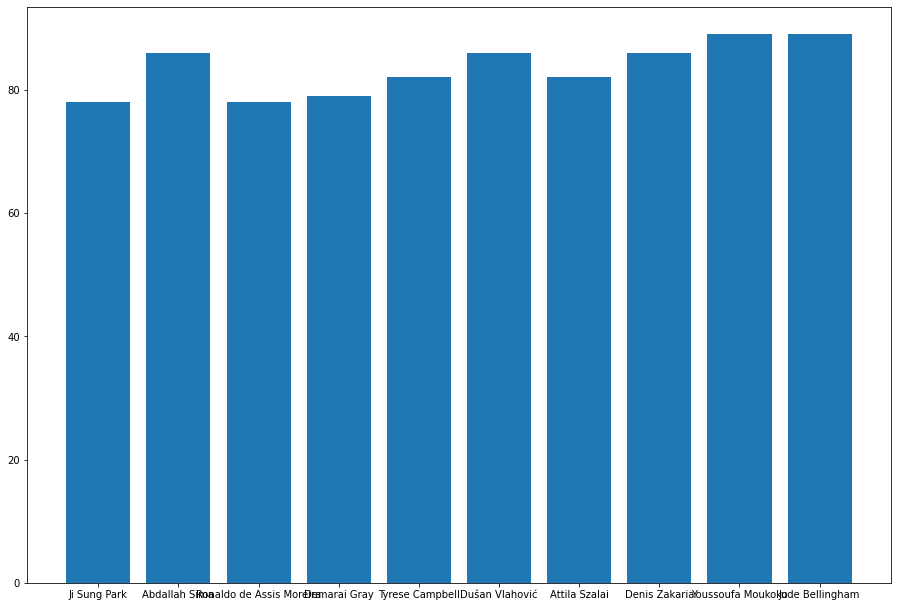

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(50)
plt = fig.add_axes([1,1,2,2])
x = fifa_final['Name'].loc[:9] 
y = fifa_final['POT'].loc[:9]

plt.bar(x,y)
# ploted bar graph using matplotlib 

In [55]:
plx.bar(newfifa_final[0:9], x= "Name", y= "POT")
# same graph with plotly which has more feature than matplotlib and better vizualization

# Q19. Plot a graph - First 10 Player's Name V/s Player's Wage

<BarContainer object of 10 artists>

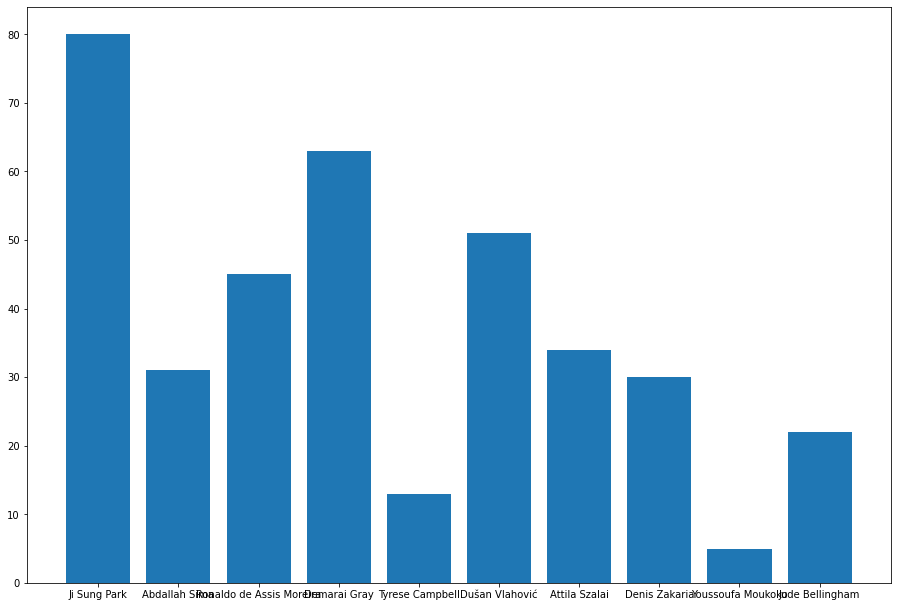

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure(30)
plt = fig.add_axes([1,1,2,2])
x = fifa_final['Name'].loc[:9]
y = fifa_final['Wage'].loc[:9]
plt.bar(x,y)
# plotted the bar graph using matplotlib

In [63]:
plx.bar(newfifa_final[0:10], x="Name", y='Wage')
# plotted the bar graph yousing the plotly

# Q 20. create a heatmap of the correlation of the dataframe

<AxesSubplot:>

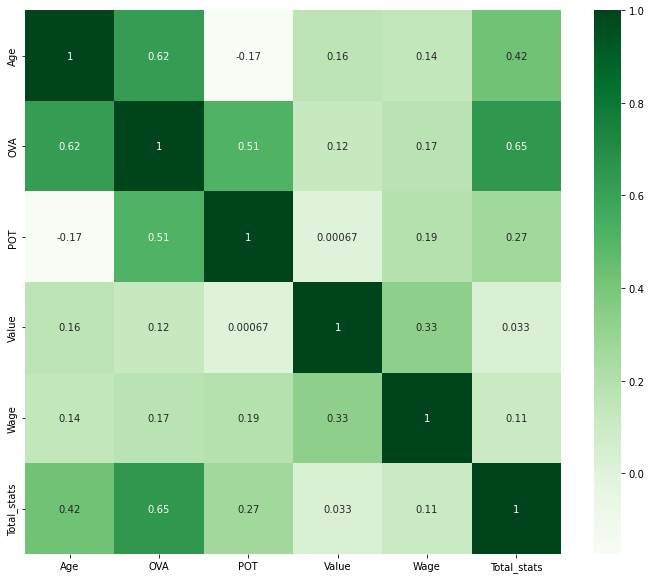

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(fifa_final.corr(), annot=True, cmap='Greens')
# we have created a heatmap using the seaborn and matplotib